# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [1]:
import pandas as pd
import numpy as np

In [2]:
artist_data = pd.read_csv("../data/lastFm/artists.dat", sep="\t")
print(artist_data.shape)
artist_data.sample(5)

(17632, 4)


,id,name,url,pictureURL
16271,17200,Starkey,http://www.last.fm/music/Starkey,http://userserve-ak.last.fm/serve/252/23697033...
8099,8292,Takanashi Yasuharu,http://www.last.fm/music/Takanashi+Yasuharu,http://userserve-ak.last.fm/serve/252/52509621...
1002,1011,Artista desconhecido,http://www.last.fm/music/Artista+desconhecido,http://userserve-ak.last.fm/serve/252/57492437...
4929,5040,Necro,http://www.last.fm/music/Necro,http://userserve-ak.last.fm/serve/252/2621715.jpg
14142,14806,Fiddler's Green,http://www.last.fm/music/Fiddler%27s+Green,http://userserve-ak.last.fm/serve/252/18719077...


In [3]:
user_artist_plays = pd.read_csv("../data/lastFm/user_artists.dat", sep="\t")
print(user_artist_plays.shape)
user_artist_plays.sample(5)

(92834, 3)


,userID,artistID,weight
32683,711,9473,61
70610,1590,906,380
40784,898,792,240
20909,454,18736,879
70482,1588,356,1571


In [4]:
tags = pd.read_csv("../data/lastFm/tags.dat", sep="\t", encoding = "ISO-8859-1")
print(tags.shape)
tags.sample(5)

(11946, 2)


,tagID,tagValue
6789,7081,undie rock
3411,3481,best cover
9834,10376,big band swing
8310,8723,overproduced by martin hannet
9748,10284,zmierzch


In [5]:
user_tagged_artists = pd.read_csv("../data/lastFm/user_taggedartists.dat", sep="\t", encoding = "ISO-8859-1")
print(user_tagged_artists.shape)
user_tagged_artists.sample(5)

(186479, 6)


,userID,artistID,tagID,day,month,year
6006,49,3947,24,1,4,2010
83474,922,70,20,1,11,2008
132281,1535,3461,24,1,3,2008
17046,171,10383,127,1,1,2011
96312,1060,5966,73,1,7,2008


## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando, quienes estén realizando la materia completa, deberán realizar ambas partes.

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

### 1.1. Artistas más escuchados

In [6]:
user_artist_plays_by_artist = (
    user_artist_plays[["artistID", "weight"]]
    .groupby(['artistID']).sum()
    .sort_values(by=["weight"], ascending=False)
)

artist_plays = user_artist_plays_by_artist.merge(artist_data, left_on="artistID", right_on="id")
artist_plays.head(10)

,weight,id,name,url,pictureURL
0,2393140,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...
1,1301308,72,Depeche Mode,http://www.last.fm/music/Depeche+Mode,http://userserve-ak.last.fm/serve/252/75022.jpg
2,1291387,89,Lady Gaga,http://www.last.fm/music/Lady+Gaga,http://userserve-ak.last.fm/serve/252/47390093...
3,1058405,292,Christina Aguilera,http://www.last.fm/music/Christina+Aguilera,http://userserve-ak.last.fm/serve/252/47363849...
4,963449,498,Paramore,http://www.last.fm/music/Paramore,http://userserve-ak.last.fm/serve/252/35837991...
5,921198,67,Madonna,http://www.last.fm/music/Madonna,http://userserve-ak.last.fm/serve/252/340387.jpg
6,905423,288,Rihanna,http://www.last.fm/music/Rihanna,http://userserve-ak.last.fm/serve/252/53023109...
7,688529,701,Shakira,http://www.last.fm/music/Shakira,http://userserve-ak.last.fm/serve/252/52116105...
8,662116,227,The Beatles,http://www.last.fm/music/The+Beatles,http://userserve-ak.last.fm/serve/252/2588646.jpg
9,532545,300,Katy Perry,http://www.last.fm/music/Katy+Perry,http://userserve-ak.last.fm/serve/252/42128121...


<AxesSubplot:ylabel='weight'>

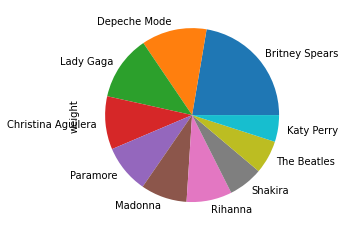

In [7]:
artist_plays.head(10).set_index("name")["weight"].plot.pie()

### 1.2. Distribución de cantidad de listens por user

<AxesSubplot:>

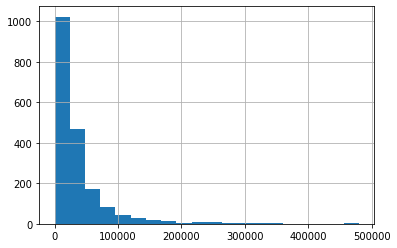

In [8]:
user_artist_plays_by_user = user_artist_plays[["userID", "weight"]].groupby(['userID']).sum()

user_artist_plays_by_user["weight"].hist(bins = 20)

### 1.3. Géneros más escuchados

In [9]:
user_artist_plays_by_artist_tags = artist_plays.merge(user_tagged_artists, left_on="id", right_on="artistID")
tags_plays = user_artist_plays_by_artist_tags[["tagID", "weight"]].groupby(['tagID']).sum()
tags_plays_merge = tags_plays.merge(tags, on="tagID").sort_values(by=["weight"], ascending=False)
tags_plays_merge.head(10)

,tagID,weight,tagValue
23,24,1043039517,pop
71,73,622063102,rock
122,130,611535548,female vocalists
38,39,569648216,dance
77,79,403229595,alternative
17,18,400420167,electronic
76,78,231167101,alternative rock
79,81,215784773,indie
24,25,209870819,80s
150,167,185446089,rnb


<AxesSubplot:ylabel='weight'>

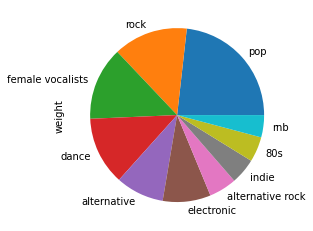

In [10]:
tags_plays_merge.head(10).set_index("tagValue")["weight"].plot.pie()

## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa deerán realizar también el [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). 

Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

### Preparación del conjunto de datos
De forma previa a la implementación del algoritmo de recomendación, es necesario asignar al valor weight registrado (cantidad de reproducciones) para cada registro, un valor dentro de una escala predefinida. Esto se hará en 3 pasos:
- Agrupar la cantidad de reproducciones por usuario y ordenarlas de mayor a menor.
- Tomar los primeros 30 registros de reproducciones por cada usuario.
- Agregar una columna "rating" que tomará un valor de 1 a 5 en base a una serie de intervalos predefinidos e identificados a partir del análisis de la distribución.

In [11]:
user_artist_plays_sorted = user_artist_plays.groupby(["userID"]).apply(lambda x: x.sort_values(["weight"],ascending = False)).reset_index(drop = True)

# user_artist_plays_top = user_artist_plays.groupby(["userID"]).head(30)
user_artist_plays_top = user_artist_plays_sorted.groupby(["userID"]).head(30)
print(user_artist_plays_top.shape)

(56006, 3)


Chequeamos algunos usuarios

In [12]:
user_artist_plays_top.head(5)

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [13]:
user_artist_plays_top[user_artist_plays_top["userID"] == 123].head(5)

,userID,artistID,weight
5815,123,88,16108
5816,123,1396,10944
5817,123,1390,7877
5818,123,3025,6756
5819,123,1195,4991


Calculamos rating

In [14]:
# user_artist_plays_top["rating"] = pd.cut(user_artist_plays_top["weight"], 5, [0, 1000, 10000, 200000, 350000, 400000], labels=["1", "2", "3", "4", "5"],include_lowest=True)
user_artist_plays_top["rating"] = pd.cut(user_artist_plays_top["weight"], [0, 1000, 10000, 200000, 350000, 400000], labels=["1", "2", "3", "4", "5"],include_lowest=True)

# La distribucion de listens por usuario decae mas o menos exponencial. Probamos "bins"  mas o menos exponenciales.
# user_artist_plays_top["rating"] = pd.cut(user_artist_plays_top["weight"], [0, 100, 1000, 10000, 100000, 500000], labels=["1", "2", "3", "4", "5"],include_lowest=True)

user_artist_plays_top["rating"].value_counts() #.plot.pie()

<ipython-input-14-665a46db8b92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_artist_plays_top["rating"] = pd.cut(user_artist_plays_top["weight"], [0, 1000, 10000, 200000, 350000, 400000], labels=["1", "2", "3", "4", "5"],include_lowest=True)


1    43044
2    12332
3      624
4        5
5        1
Name: rating, dtype: int64

In [15]:
user_artist_plays_top.head()

,userID,artistID,weight,rating
0,2,51,13883,3
1,2,52,11690,3
2,2,53,11351,3
3,2,54,10300,3
4,2,55,8983,2


### Ejecicio 2.a

In [16]:
# Importación de librerías necesarias.
from surprise import Dataset, Reader, KNNWithMeans, NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split

### 2.a.1. Matriz de contenido

In [17]:
reader = Reader(rating_scale=(1, 5))

ratings = Dataset.load_from_df(user_artist_plays_top[["userID", "artistID", "rating"]], reader)

### 2.a.2 Entrenamiento y análisis de algoritmos de recomendación

In [18]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, ratings, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [19]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [20]:
surprise_results.head()

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.355819,7.043529,0.340710
SVD,0.363353,1.119641,0.083993
BaselineOnly,0.370292,0.046654,0.094358
KNNWithMeans,0.377807,0.113938,0.671454
KNNWithZScore,0.382021,0.156490,0.731941


In [21]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.2)
sim_options = {'name': 'pearson_baseline', 'user_based': False}
model = SVDpp(random_state=42)
model.fit(ratings_train)
predictions = model.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

RMSE on test: 0.3536


In [22]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(ratings_train.ur[ratings_train.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(ratings_train.ir[ratings_train.to_inner_iid(iid)])
    except ValueError:
        return 0

df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [23]:
df_predictions.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,1223,1412,1.0,1.370406,{'was_impossible': False},24,107,0.370406
1,1430,1400,1.0,1.064198,{'was_impossible': False},24,66,0.064198
2,1196,498,2.0,1.788681,{'was_impossible': False},24,223,0.211319
3,814,412,1.0,1.289133,{'was_impossible': False},23,69,0.289133
4,728,9630,1.0,1.431881,{'was_impossible': False},25,1,0.431881


In [24]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

In [25]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1824,1293,1179,1.0,1.0,{'was_impossible': False},25,21,0.0
7216,1390,1090,1.0,1.0,{'was_impossible': False},26,84,0.0
7218,1122,324,1.0,1.0,{'was_impossible': False},23,43,0.0
7219,1125,4875,1.0,1.0,{'was_impossible': False},26,2,0.0
7234,878,1032,1.0,1.0,{'was_impossible': False},26,31,0.0
7235,1525,1698,1.0,1.0,{'was_impossible': False},25,5,0.0
1909,1312,491,1.0,1.0,{'was_impossible': False},24,7,0.0
1901,967,11457,1.0,1.0,{'was_impossible': False},25,0,0.0
7239,1181,631,1.0,1.0,{'was_impossible': False},22,7,0.0
1899,1807,2429,1.0,1.0,{'was_impossible': False},21,6,0.0


In [26]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
6181,1034,475,3.0,1.206604,{'was_impossible': False},22,90,1.793396
10688,598,289,3.0,1.200045,{'was_impossible': False},21,370,1.799955
1631,425,291,3.0,1.163236,{'was_impossible': False},22,132,1.836764
9090,291,344,3.0,1.143206,{'was_impossible': False},20,134,1.856794
10836,442,187,3.0,1.128559,{'was_impossible': False},21,48,1.871441
5747,3,101,3.0,1.080748,{'was_impossible': False},20,1,1.919252
10028,1983,701,3.0,1.000000,{'was_impossible': False},27,186,2.000000
2757,1094,511,4.0,1.538869,{'was_impossible': False},26,94,2.461131
5772,1664,498,4.0,1.187548,{'was_impossible': False},26,223,2.812452
87,2071,792,4.0,1.104053,{'was_impossible': False},24,13,2.895947


### 2.a.3 Sistema de recomendación

In [27]:
from collections import defaultdict
from collections import Counter

def get_top_n_similar(predictions, artistID, n=10):
    # Mapeo de predicciones por cada usuario
    top_n = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Se toman las 10 primeras predicciones de cada usuario
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    # Se recorren para todos los usuarios, aquellas listas en las que aparece el artista, y se eligen los 10 más frecuentes.
    artistIDs = []
    for uid, user_ratings in top_n.items():
        agregarIds = False
        for rating in user_ratings:
            iid = rating[0]
            if (iid == artistID):
                agregarIds = True
                break
        if (agregarIds == True):
            for rating in user_ratings:
                artistIDs.append(rating[0])

    list_freq = (Counter(artistIDs)).most_common(n)

    return list_freq

In [28]:
def print_top_10_similar(artist_name):
    artistID = artist_data[artist_data["name"].str.lower() == artist_name.lower()].id.item()

    top_n_similar = get_top_n_similar(predictions, artistID, 10)

    for key, value in top_n_similar:
        if (key != artistID):
            print(artist_data[artist_data["id"] == key].name.item())

In [29]:
print_top_10_similar("The Rolling Stones")

The Beatles
The Doors
Megadeth
Motörhead
The Black Crowes
Led Zeppelin
The Who
The Yardbirds
Bessie Smith


In [30]:
print_top_10_similar("ABBA")

Justin Timberlake
The Beatles
Alizée
Robyn
Queen
Roxette
Ronan Keating
From Autumn to Ashes
Yeah Yeah Yeahs


Artistas sin similares

In [31]:
print_top_10_similar("The Archies")

### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

### 2.b.1 Evaluación sobre cold start
Para abordar el problema de cold start, el análisis se realizó sobre los tags asignados a los artistas. Se resolvió trabajar sólo con las primeras 3 tags más relevantes de cada artista.

In [32]:
user_tagged_artists_count = user_tagged_artists[["artistID", "tagID"]]
user_tagged_artists_count["count"] = user_tagged_artists_count.groupby(["artistID", "tagID"])["tagID"].transform("count")
user_tagged_artists_count = user_tagged_artists_count.drop_duplicates()
user_tagged_artists_count = user_tagged_artists_count.groupby(["artistID"]).apply(lambda x: x.sort_values(["count"],ascending = False)).reset_index(drop = True)

user_tagged_artists_count = user_tagged_artists_count.groupby("artistID").head(3)

<ipython-input-32-2e97f18b9452>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_tagged_artists_count["count"] = user_tagged_artists_count.groupby(["artistID", "tagID"])["tagID"].transform("count")


In [33]:
user_tagged_artists_count.head()

,artistID,tagID,count
0,1,139,5
1,1,141,3
2,1,179,2
7,2,575,8
8,2,30,5


Luego, sobre el dataset que contiene los 3 tags más frecuentes de cada artista se hace una operación "merge" con los tags para tener los nombres de cada género.

In [34]:
# Merge con Tags para tener los nombres de tags
artists_tags_top = user_tagged_artists_count.merge(tags, on="tagID").drop_duplicates()

artists_tags_top.sample(5)

,artistID,tagID,count,tagValue
14041,4648,33,1,experimental
27916,8105,1098,1,miserable
24574,784,8670,1,iron jesus
9923,1574,130,1,female vocalists
11776,16707,78,1,alternative rock


Algunas tags parecen no ser buenas para determinar género.

### 2.b.2 Vector de contenido

Para armar el vector de contenido, se tomará una lista de valores únicos de aquellos tags que se encuentran en el dataset que almacena los 3 tags más frecuentes por cada artista. 

In [35]:
used_tags = artists_tags_top['tagValue'].drop_duplicates()
used_tags

0                j-rock
66           visual kei
129              gothic
218            darkwave
280              german
              ...      
32403             ustad
32404         a capella
32405    massive attack
32406         trip beat
32407        dead music
Name: tagValue, Length: 2821, dtype: object

El vector de contenido será resultado de una transformación del dataset "artists_tags_top", agregando una columna por cada género (tag) y quitando las restantes columnas.

In [36]:
# Vector de contenido.
for g in used_tags:
    artists_tags_top[g] = artists_tags_top.tagValue.transform(lambda x: int(g in x))
   
artists_tags_transform = artists_tags_top.drop(columns=['tagValue', 'count', 'artistID', 'tagID'])
artists_tags_transform.head()

,j-rock,visual kei,gothic,darkwave,german,black metal,true norwegian black metal,norwegian black metal,japanese,gothic rock,...,ou nao,batcave deathrock,stoner power rock,italodance,amazing singer,ustad,a capella,massive attack,trip beat,dead music
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.b.3 Sistema de recomendación

El sistema de recomendación utilizará la implementación de Similitud Coseno de sklearn como métrica de cálculo.

In [37]:
# Cálculo de similitud coseno
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(artists_tags_transform, artists_tags_transform)

In [38]:
# Sistema de recomendación
def artists_finder(artist_name):
    artists_idx = dict(zip(artist_data['name'], list(artist_data.index)))
    n_recommendations = 10

    idx = artists_idx[artist_name]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # eliminamos el propio artista.
    sim_scores[idx] = (idx, 0)

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # sim_scores = sim_scores[1:(n_recommendations+1)]
    sim_scores = sim_scores[:n_recommendations]

    similar_artists = [i[0] for i in sim_scores]
    
    return artist_data['name'].iloc[similar_artists]

In [39]:
artist_name = "The Beatles"

print("Artistas similares para {}:".format(artist_name))
for artist in artists_finder(artist_name):
    print("\t{}".format(artist))

Artistas similares para The Beatles:
	Yeong-wook Jo
	Interpol
	Queens of the Stone Age
	Kings of Leon
	The Killers
	Green Day
	Devendra Banhart
	Sunset Rubdown
	Nine Inch Nails
	Nirvana


In [40]:
artist_name = "ABBA"

print("Artistas similares para {}:".format(artist_name))
for artist in artists_finder(artist_name):
    print("\t{}".format(artist))

Artistas similares para ABBA:
	MSTRKRFT
	Calvin Harris
	Pendulum
	King Crimson
	Led Zeppelin
	Genesis
	Paul McCartney
	Creedence Clearwater Revival
	George Harrison
	Týr


### 2.b.4 Evaluación manual del sistema

Usamos los datos calculados para el [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación)

In [41]:
# Elegimos 5 artistas al azar.
cold_set = user_artist_plays_top["artistID"].sample(5).unique()

# y los borramos.
hot_df = user_artist_plays_top[~user_artist_plays_top["artistID"].isin(cold_set)]

In [42]:
cold_set

array([  503, 11048,   533,  2133, 16183])

Entrenamos el mismo modelo que antes pero para un subset de artistas.

In [43]:
reader = Reader(rating_scale=(1, 5))
ratings = Dataset.load_from_df(hot_df[["userID", "artistID", "rating"]], reader)

ratings_train, ratings_test = train_test_split(ratings, test_size=0.2)
sim_options = {'name': 'pearson_baseline', 'user_based': False}
model = SVDpp(random_state=42)
model.fit(ratings_train)
predictions = model.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))


def print_top_hibrid(artistID):
    artist_name = artist_data[artist_data.id == artistID].name.item()
    related_artists = artists_finder(artist_name)[:5]

    result = []
    for ra_name in related_artists:
        print(ra_name)
        ra_id = artist_data[artist_data.name == ra_name].id.item()
        for artist_id, score in get_top_n_similar(predictions, ra_id, 3):
            a_name = artist_data[artist_data.id == artist_id].name.item()
            print(f"  - {a_name}")

RMSE on test: 0.3481


In [44]:
for cs in cold_set:
    cs_name = artist_data[artist_data.id == cs].name.item()
    print(cs_name)
    print_top_hibrid(cs)
    print()

In Flames
The National
  - The National
  - Interpol
  - Razorlight
Cordel do Fogo Encantado
Sigur Rós
  - Sigur Rós
  - The Beatles
  - Depeche Mode
Tokyo Police Club
The Kills
  - Mando Diao
  - Placebo
  - The Kills

Chillsongs
Rosa Tattooada
  - Pink Floyd
  - Led Zeppelin
  - Rosa Tattooada
Garotos da Rua
Camisa de Vênus
Uns e Outros
Anthony Hamilton

Oasis
Little Boots
  - Little Boots
  - Katy Perry
  - Frankmusik
No Doubt
  - No Doubt
  - Eric Clapton
  - Andrea Corr
Sophie Ellis-Bextor
Good Charlotte
  - Good Charlotte
  - The Beatles
  - Kylie Minogue
The Used
  - The Used
  - Placebo
  - Red

Milburn
MSTRKRFT
Calvin Harris
Pendulum
  - Pendulum
  - Escape The Fate
  - Slipknot
King Crimson
  - King Crimson
  - Dark Tranquillity
  - Death
Led Zeppelin
  - Led Zeppelin
  - The Beatles
  - The Doors

Трагедия Всей Жизни
Sandro
Javier Malosetti
Vox Dei
Manal
Sandro y los de Fuego

